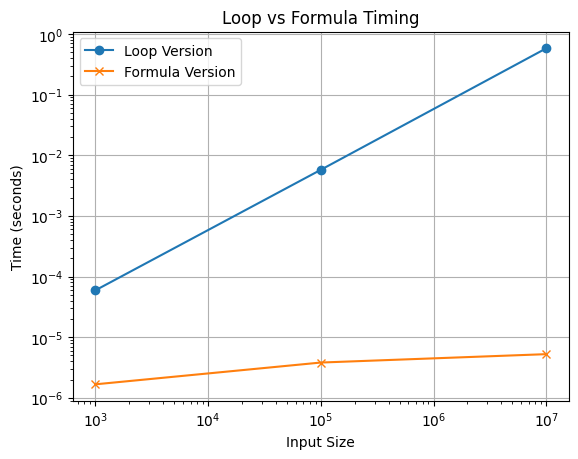

Size=1000: Loop took 0.000059 sec, Formula took 0.000002 sec
Size=100000: Loop took 0.005743 sec, Formula took 0.000004 sec
Size=10000000: Loop took 0.578613 sec, Formula took 0.000005 sec


In [6]:
# Q1. Timing Functions
# Write two functions:

# A function that computes the sum of integers from 1 to n using a loop.
# A function that computes the sum of integers from 1 to n using the formula (n(n+1)/2).
# Use Python's time module to measure execution time for increasing values of n ([10**3, 10**5, 10**7]).

# Task: Compare the timing results and explain why they differ.

# The loop version adds numbers one by one, so for big n like 10000000, it’s doing tons of additions,
# like counting a huge stack of coins. The formula version uses a quick math trick (n * (n + 1) / 2),
#  which is always a few steps. That’s why the loop gets super slow for big n, but the formula is fast.
#  The plot should show the loop’s time shooting up while the formula stays low.

import time
import matplotlib.pyplot as plt

# Loop version
def sum_with_loop(max_num):
    sum_so_far = 0
    for i in range(1, max_num + 1):
        sum_so_far += i
    return sum_so_far

# Formula version
def sum_with_formula(max_num):
    return max_num * (max_num + 1) // 2  # Integer division

# Timing test
input_sizes = [1000, 100000, 10000000]  # 10^3, 10^5, 10^7
loop_times = []
formula_times = []

for size in input_sizes:
    # Time loop version
    start = time.time()
    sum_with_loop(size)
    loop_times.append(time.time() - start)

    # Time formula version
    start = time.time()
    sum_with_formula(size)
    formula_times.append(time.time() - start)

# Plotting (fixed syntax)
plt.plot(input_sizes, loop_times, label='Loop Version', marker='o')
plt.plot(input_sizes, formula_times, label='Formula Version', marker='x')
plt.xscale('log')  # Log scale for big numbers
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Loop vs Formula Timing')
plt.legend()
plt.grid(True)
plt.show()

# Print results
for i in range(len(input_sizes)):
    print(f'Size={input_sizes[i]}: Loop took {loop_times[i]:.6f} sec, Formula took {formula_times[i]:.6f} sec')

In [7]:
# Q2. Counting Operations
# Modify your loop-based sum function to count how many operations it performs for input size n.

# Task: Express its growth in terms of Big-O notation.

# we are counting assignments, additions, and comparisons. There’s 1 assignment at the start (sum_so_far = 0). The loop runs max_num times, each with 1 addition and 1
# assignment (sum_so_far += i), plus 1 comparison and 1 assignment for i. That’s about 4*max_num + 1 operations. For Big-O, I drop the +1 and the 4, so it’s O(n).
#  Operations grow straight with the input size.

def sum_with_loop_count(max_num):
    num_steps = 0
    sum_so_far = 0  # 1 assignment
    num_steps += 1
    for i in range(1, max_num + 1):  # max_num iterations
        sum_so_far += i  # 1 addition, 1 assignment
        num_steps += 2
    num_steps += max_num  # loop comparisons
    num_steps += max_num  # loop variable assignments
    return sum_so_far, num_steps

# Test it
for size in [1000, 100000, 10000000]:
    result, steps = sum_with_loop_count(size)
    print(f'Size={size}: {steps} operations')

Size=1000: 4001 operations
Size=100000: 400001 operations
Size=10000000: 40000001 operations


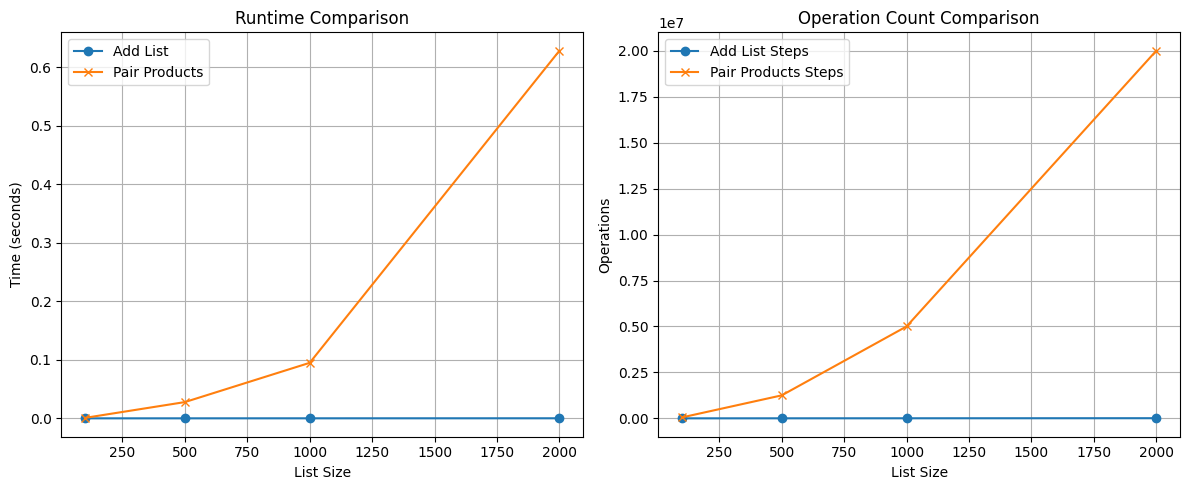

Size=100: Add time=0.000010s, 401 steps; Pair time=0.000805s, 50201 steps
Size=500: Add time=0.000030s, 2001 steps; Pair time=0.027792s, 1251001 steps
Size=1000: Add time=0.000065s, 4001 steps; Pair time=0.094919s, 5002001 steps
Size=2000: Add time=0.000115s, 8001 steps; Pair time=0.628394s, 20004001 steps


In [8]:
# Q3. Linear vs Quadratic Growth
# Consider the following two functions:

# def linear_sum(L):
#     total = 0
#     for x in L:
#         total += x
#     return total

# def quadratic_pairs(L):
#     count = 0
#     for i in L:
#         for j in L:
#             count += i*j
#     return count
# Task:

# Count the number of operations for both functions.
# Determine their order of growth (Big-O and Big-Theta).
# Plot their runtime growth for increasing input sizes.


# For add_list, I count 1 assignment (sum_so_far = 0), n additions, n assignments, n comparisons, n loop assignments.
# That’s 4n + 1 operations. Big-O is O(n) since it’s linear, and Big-Theta is Θ(n) because that’s the exact growth.
# For pair_products, it’s 1 assignment (total = 0), n outer loops, each with n inner loops. Each inner loop does 1 multiplication,
# 1 addition, 1 assignment (3n² total). Plus n comparisons and
# assignments for the outer loop, and n*n for inner loop
# comparisons and assignments. Total is about 5n² + 2n + 1. Big-O is O(n²), Big-Theta is Θ(n²) since n² dominates.
#  The plots should show add_list growing slow and pair_products spiking up fast.

def add_list(my_list):
    sum_so_far = 0  # 1 assignment
    num_steps = 1
    for num in my_list:  # len(my_list) iterations
        sum_so_far += num  # 1 addition, 1 assignment
        num_steps += 2
    num_steps += len(my_list)  # comparisons
    num_steps += len(my_list)  # loop assignments
    return sum_so_far, num_steps

def pair_products(my_list):
    total = 0  # 1 assignment
    num_steps = 1
    for x in my_list:  # len(my_list) iterations
        for y in my_list:  # len(my_list) iterations per x
            total += x * y  # 1 multiplication, 1 addition, 1 assignment
            num_steps += 3
        num_steps += len(my_list)  # inner loop comparisons
        num_steps += len(my_list)  # inner loop assignments
    num_steps += len(my_list)  # outer loop comparisons
    num_steps += len(my_list)  # outer loop assignments
    return total, num_steps

# Timing and counting
list_sizes = [100, 500, 1000, 2000]
add_times = []
pair_times = []
add_steps = []
pair_steps = []

for size in list_sizes:
    numbers = list(range(size))

    start = time.time()
    _, steps = add_list(numbers)
    add_times.append(time.time() - start)
    add_steps.append(steps)

    start = time.time()
    _, steps = pair_products(numbers)
    pair_times.append(time.time() - start)
    pair_steps.append(steps)

# Plotting (fixed syntax)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(list_sizes, add_times, label='Add List', marker='o')
plt.plot(list_sizes, pair_times, label='Pair Products', marker='x')
plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Runtime Comparison')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(list_sizes, add_steps, label='Add List Steps', marker='o')
plt.plot(list_sizes, pair_steps, label='Pair Products Steps', marker='x')
plt.xlabel('List Size')
plt.ylabel('Operations')
plt.title('Operation Count Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
for i in range(len(list_sizes)):
    print(f'Size={list_sizes[i]}: Add time={add_times[i]:.6f}s, {add_steps[i]} steps; Pair time={pair_times[i]:.6f}s, {pair_steps[i]} steps')

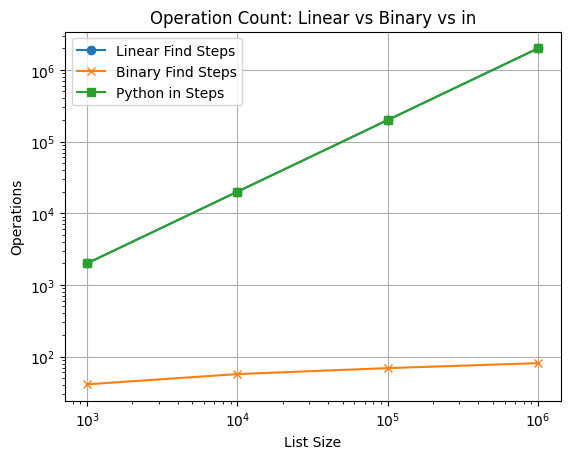

Size=1000: Linear steps=2000, Binary steps=41, Python in steps=2000
Size=10000: Linear steps=20000, Binary steps=57, Python in steps=20000
Size=100000: Linear steps=200000, Binary steps=69, Python in steps=200000
Size=1000000: Linear steps=2000000, Binary steps=81, Python in steps=2000000


In [9]:
# Q4. Searching Algorithms
# Implement linear search and binary search.
# Count the number of operations each requires for lists of size [10**3, 10**4, 10**5, 10**6].
# Compare against Python's built-in in operator.
# Task: Plot how the number of operations grows with input size and explain the difference between Θ(n) and Θ(log n).

# Linear find checks every element, so worst case is ~2n steps (n comparisons, n assignments). Big-O and Big-Theta are O(n) and Θ(n).
# Binary find splits the list in half each time, so ~log n iterations with ~3 steps each (comparison, assignment, math). Total is ~3 log n, so Big-O is O(log n),
#  Big-Theta is Θ(log n). Python’s in for lists is like linear find, so O(n) and Θ(n). The plot should show linear and in growing fast, while binary stays low since log n is small.

def linear_find(my_list, target):
    num_steps = 0
    for i in range(len(my_list)):
        num_steps += 1  # loop comparison
        if my_list[i] == target:
            num_steps += 1  # comparison
            return i, num_steps
        num_steps += 1  # comparison
    num_steps += len(my_list)  # loop assignments
    return -1, num_steps

def binary_find(my_list, target):
    num_steps = 0
    left_edge = 0
    right_edge = len(my_list) - 1  # 2 assignments
    num_steps += 2
    while left_edge <= right_edge:
        num_steps += 1  # comparison
        middle = (left_edge + right_edge) // 2  # 1 assignment
        num_steps += 1
        if my_list[middle] == target:
            num_steps += 1
            return middle, num_steps
        elif my_list[middle] < target:
            left_edge = middle + 1  # 1 assignment
            num_steps += 2  # comparison + assignment
        else:
            right_edge = middle - 1  # 1 assignment
            num_steps += 2
    return -1, num_steps

# Test and count
list_sizes = [1000, 10000, 100000, 1000000]
linear_steps = []
binary_steps = []
in_steps = []

for size in list_sizes:
    numbers = list(range(size))  # Sorted list
    target = size - 1  # Worst case for linear

    _, steps = linear_find(numbers, target)
    linear_steps.append(steps)

    _, steps = binary_find(numbers, target)
    binary_steps.append(steps)

    # Simulate Python’s `in`
    steps = 0
    for num in numbers:
        steps += 2  # comparison + loop overhead
        if num == target:
            break
    in_steps.append(steps)

# Plotting (fixed syntax)
plt.plot(list_sizes, linear_steps, label='Linear Find Steps', marker='o')
plt.plot(list_sizes, binary_steps, label='Binary Find Steps', marker='x')
plt.plot(list_sizes, in_steps, label='Python in Steps', marker='s')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('List Size')
plt.ylabel('Operations')
plt.title('Operation Count: Linear vs Binary vs in')
plt.legend()
plt.grid(True)
plt.show()

# Results
for i in range(len(list_sizes)):
    print(f'Size={list_sizes[i]}: Linear steps={linear_steps[i]}, Binary steps={binary_steps[i]}, Python in steps={in_steps[i]}')

In [12]:
# Q5. Matrix Multiplication
# Write a function to multiply two n×n matrices.
# Count the number of operations.
# Express the complexity in Big-O and Big-Theta notation.
# Hint: Nested loops matter!


# count n² assignments for the result matrix. Three nested loops: n for i, n for j, n for k. Inner loop does 1
# multiplication, 1 addition, 1 assignment (n³ times). Plus n³ comparisons and assignments
#  for the inner loop, n² for the middle, n for the outer. Total is ~3n³ + 2n² + n. Big-O is O(n³) since n³
#  is the biggest, and Big-Theta is Θ(n³) because that’s the main growth.

def multiply_matrices(mat1, mat2):
    n = len(mat1)
    result_mat = [[0] * n for _ in range(n)]  # n*n assignments
    num_steps = n * n
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result_mat[i][j] += mat1[i][k] * mat2[k][j]  # 1 mul, 1 add, 1 assign
                num_steps += 3
            num_steps += n  # inner loop comparisons, assignments
        num_steps += n  # middle loop comparisons, assignments
    num_steps += n  # outer loop comparisons, assignments
    return result_mat, num_steps

# Test
n = 10
mat1 = [[1] * n for _ in range(n)]
mat2 = [[1] * n for _ in range(n)]
_, steps = multiply_matrices(mat1, mat2)
print(f'Matrix multiply (n={n}): {steps} operations')

Matrix multiply (n=10): 4210 operations


In [13]:
# Q6. Best, Worst, and Average Case
# Modify your linear search to count operations separately for:

# Best case (element is first)
# Worst case (element is last or missing)
# Average case (element is in the middle)
# Task: Report the operation counts and classify their Big-O/Theta behavior.


# Best case (target at start) is 2 steps (1 loop comparison, 1 match). Big-O and Big-Theta are O(1) and
# Θ(1). Worst case (target at end or missing) takes ~2n steps (n comparisons, n assignments).
#  Big-O and Big-Theta are O(n) and Θ(n). Average case (target in middle) is ~n steps, so O(n)
#   and Θ(n). Best case is quick, but worst and average grow with the list size.


def linear_find_cases(my_list, target):
    num_steps = 0
    for i in range(len(my_list)):
        num_steps += 1  # loop comparison
        if my_list[i] == target:
            num_steps += 1  # comparison
            return i, num_steps
        num_steps += 1  # comparison
    num_steps += len(my_list)  # loop assignments
    return -1, num_steps

# Test cases
n = 1000
numbers = list(range(n))

# Best case: first element
_, best_steps = linear_find_cases(numbers, 0)
# Worst case: last element
_, worst_steps = linear_find_cases(numbers, n-1)
# Average case: middle element
_, avg_steps = linear_find_cases(numbers, n//2)

print(f'Size={n}: Best case={best_steps} steps, Worst case={worst_steps} steps, Average case={avg_steps} steps')

Size=1000: Best case=2 steps, Worst case=2000 steps, Average case=1002 steps
